In [3]:
import pandas as pd
import seaborn as sns

In [42]:
data = pd.read_csv("glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

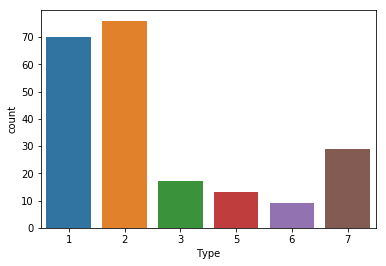

In [6]:
sns.countplot(data["Type"])

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit, GridSearchCV
from sklearn import metrics 

In [8]:
X = data.iloc[:,0:9]
print(X.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0


In [9]:
Y = data["Type"]
print(Y.head())

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64


In [10]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state = 5, test_size = 0.30)

In [11]:
dt_model = DecisionTreeClassifier()
dt_model.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
predicted = dt_model.predict(test_x)

In [13]:
rms = metrics.mean_squared_error(predicted, test_y)
print(rms)

2.1384615384615384


In [14]:
print(metrics.accuracy_score(predicted, test_y))

0.7538461538461538


In [26]:
kf = KFold(n_splits=3)

In [77]:
for train_index, test_index in kf.split(X):
    #rint("TRAIN:", train_x, "TEST:", test_x)
    x_train, x_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    dt_model.fit(x_train, y_train)
    predicted = dt_model.predict(x_test)
    print("Accuracy Score : " + str(metrics.accuracy_score(predicted[0:], y_test.values)))

Accuracy Score : 0.013888888888888888
Accuracy Score : 0.29577464788732394
Accuracy Score : 0.028169014084507043


In [ ]:
print(cross_val_score(dt_model, X, Y, cv = 3, scoring="accuracy").mean())

In [82]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

parameter_candidates = [{1},{2}]

cv = ShuffleSplit()
clf = GridSearchCV(estimator= rf_model,
                   param_grid=parameter_candidates, n_jobs=-1, cv=cv)

AttributeError: 'set' object has no attribute 'items'